## Set up

In [1]:
# 'pip': The PyPA recommended tool for installing Python packages
# the '!' runs the line the same as in the terminal

!pip install seaborn 

In [2]:
# imports a library 'pandas', names it as 'pd'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
# various options in pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

## Load a data set

"Census Income" dataset

http://archive.ics.uci.edu/ml/

In [4]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql,
and even copy and paste...

http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## View

In [5]:
# no null values
# columns with numberical values type int64

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# there's a space before each string...
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [8]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

## Strip spaces in columns

In [9]:
# loop through each column and strip all the ' 's

for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].map(lambda x: x.strip(' '))

In [10]:
# Here's a break down of what that for loop is doing

In [11]:
# loops through df and gets the column names
for col in df:
    print col

age
workclass
fnlwgt
education
education_num
marital_status
occupation
relationship
ethnicity
gender
capital_gain
capital_loss
hours_per_week
country_of_origin
income


In [12]:
# gets the column type
df.education.dtype

dtype('O')

In [13]:
# if True then applys the map function
df.education.dtype == object

True

In [14]:
# strip function
x = ' string'
x.strip(' ')

'string'

In [15]:
# lambda creates a 'throw away' or 'anonymous' function
strip_string = lambda x: x.strip(' ')
strip_string(' string')

'string'

In [16]:
# same as this
def strip_string2(x):
    x = x.strip(' ')
    return x

In [17]:
strip_string2(' string')

'string'

In [18]:
# map applies the function to each item in the data frame column so

df[col].map(lambda x: x.strip(' '))

# does the same thing as

df['workclass'].map(strip_string2)

# but in the first case we don't have to define and name a function

0           State-gov
1    Self-emp-not-inc
2             Private
3             Private
4             Private
5             Private
6             Private
7    Self-emp-not-inc
...
32553         Private
32554         Private
32555         Private
32556         Private
32557         Private
32558         Private
32559         Private
32560    Self-emp-inc
Name: workclass, Length: 32561, dtype: object

for more info on lambda and map

http://www.python-course.eu/lambda.php

## Descriptive 

In [19]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
dtype: int64

In [20]:
df.hours_per_week.mean()

40.437455852092995

In [21]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00
mean,38.58,1077.65,87.30,40.44
std,13.64,7385.29,402.96,12.35
min,17.00,0.00,0.00,1.00
25%,28.00,0.00,0.00,40.00
50%,37.00,0.00,0.00,40.00
75%,48.00,0.00,0.00,45.00
max,90.00,99999.00,4356.00,99.00


## Find nulls

In [22]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income


In [23]:
# you could drop all those rows with
df_no_nulls = df[df.age.notnull()]

## Fill nulls

In [24]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [25]:
null_df

,column1
0,1
1,2
2,4
3,NaN


In [26]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1
1       2
2       4
3    1000
Name: column1, dtype: float64

In [27]:
null_df.column1.fillna(null_df.column1.median())

0    1
1    2
2    4
3    2
Name: column1, dtype: float64

In [28]:
null_df.column1.fillna('string')

0         1
1         2
2         4
3    string
Name: column1, dtype: object

## Selecting rows and columns 

In [29]:
# select a row
df.iloc[0]

age                             39
workclass                State-gov
fnlwgt                       77516
education                Bachelors
education_num                   13
marital_status       Never-married
occupation            Adm-clerical
relationship         Not-in-family
ethnicity                    White
gender                        Male
capital_gain                  2174
capital_loss                     0
hours_per_week                  40
country_of_origin    United-States
income                       <=50K
Name: 0, dtype: object

In [30]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [31]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [32]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [33]:
df.loc[0:2, ['age', 'relationship ']]

,age,relationship
0,39,NaN
1,50,NaN
2,38,NaN


## Differences between .loc, .iloc, and .ix

http://pandas.pydata.org/pandas-docs/stable/indexing.html

by label

.loc[]

by integer position

.iloc[]

for both

.ix[]

In [34]:
df_index = pd.DataFrame([[1,2,3,4],[2,4,6,8],[3,5,7,9]], [11,13,12], columns = ['A', 0, 1, 'B'])

In [35]:
df_index

,A,0,1,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [36]:
# iloc indexes by postion, not by the labels in the index
df_index.iloc[0:1]

,A,0,1,B
11,1,2,3,4


In [37]:
# with loc both the start and the stop are included
df_index.loc[11:12]

,A,0,1,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [38]:
# select columns by position
df_index.iloc[:,0:1]

,A
11,1
13,2
12,3


In [39]:
# or by label
df_index.loc[:,0:1]

,0,1
11,2,3
13,4,6
12,5,7


In [40]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,0:1]

,0,1
11,2,3
13,4,6
12,5,7


## Rename columns

In [41]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num', u'marital_status', u'occupation', u'relationship', u'ethnicity', u'gender', u'capital_gain', u'capital_loss', u'hours_per_week', u'country_of_origin', u'income'], dtype='object')

In [42]:
# replace a column name
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)

## Boolean

In [43]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [44]:
df[df.native_country == 'United-States'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K


In [46]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].income.value_counts()

<=50K    1137
>50K      536
dtype: int64

## Groupby

In [47]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['relationship']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
relationship,,,,,,
Husband,43.82,187074.86,10.33,1795.06,124.16,44.12
Not-in-family,38.35,191131.80,10.32,743.33,75.39,40.60
Other-relative,33.16,205059.82,8.79,279.60,51.33,37.01
Own-child,24.83,193175.41,9.49,155.66,39.51,33.27
Unmarried,40.29,191128.41,9.64,455.03,41.46,39.10
Wife,39.85,181849.51,10.46,1659.79,118.01,36.86


In [48]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

count   mean
income native_country                  
<=50K  ?                     437  36.85
       Cambodia               12  35.67
       Canada                 82  41.01
       China                  55  41.80
       Columbia               57  39.23
       Cuba                   70  47.29
       Dominican-Republic     68  37.94
       Ecuador                24  34.83
       El-Salvador            97  32.65
       England                60  38.97
...                          ...    ...
>50K   Portugal                4  40.00
       Puerto-Rico            12  46.50
       Scotland                3  52.67
       South                  16  44.88
       Taiwan                 20  40.80
       Thailand                3  32.67
       Trinadad&Tobago         2  42.50
       United-States        7171  44.30
       Vietnam                 5  35.40
       Yugoslavia              6  40.17

[82 rows x 2 columns]

In [49]:
# combine groupby with boolean

df[df.native_country != 'United-States'].groupby(['education']).hours_per_week.mean()

education
10th            38.42
11th            36.33
12th            40.24
1st-4th         40.27
5th-6th         39.69
7th-8th         40.41
9th             38.08
Assoc-acdm      38.74
Assoc-voc       41.30
Bachelors       41.84
Doctorate       45.29
HS-grad         40.32
Masters         41.24
Preschool       40.91
Prof-school     47.03
Some-college    38.74
Name: hours_per_week, dtype: float64

## plotting with pandas

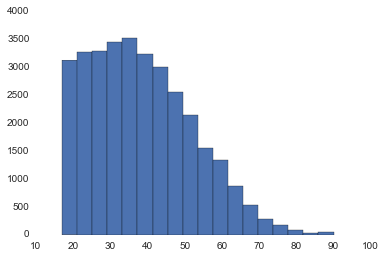

In [50]:
df.age.hist(bins = 18);

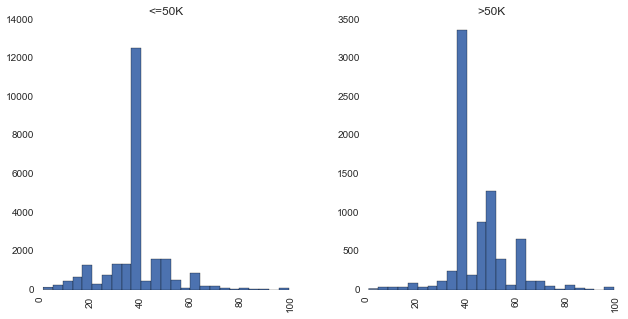

In [51]:
# split the histograms by another column (with relatively few unique values)
df.hours_per_week.hist(by = df.income, bins = 25, figsize = (10,5));

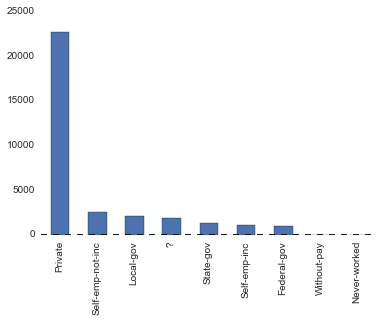

In [52]:
# use value_counts() and a bar plot
df['workclass'].value_counts().plot(kind = 'bar')

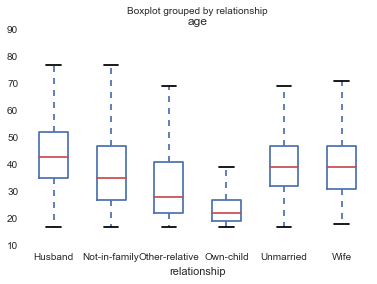

In [53]:
df.boxplot(['age'], by = 'relationship');